In [1]:
import pandas as pd
import numpy as np
import covsirphy as cvp

In [2]:
df = pd.read_csv('data_us.csv')

In [3]:
df.tail()

,Unnamed: 0,index,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
183,183,34394,2020-07-23,4038816,144430,1233269,2661117,68695,1114,22420,339573798,335534982,19.631237,68695
184,184,34581,2020-07-24,4112531,145560,1261624,2705347,73715,1130,28355,339573798,335461267,19.631017,73715
185,185,34768,2020-07-25,4178970,146465,1279414,2753091,66439,905,17790,339573798,335394828,19.630819,66439
186,186,34955,2020-07-26,4233923,146935,1297863,2789125,54953,470,18449,339573798,335339875,19.630655,54953
187,187,35142,2020-07-27,4290259,148011,1325804,2816444,56336,1076,27941,339573798,335283539,19.630487,56336


In [4]:
data_cols = ['Deaths', 'Recovered', 'Active', 'Log susceptiple']

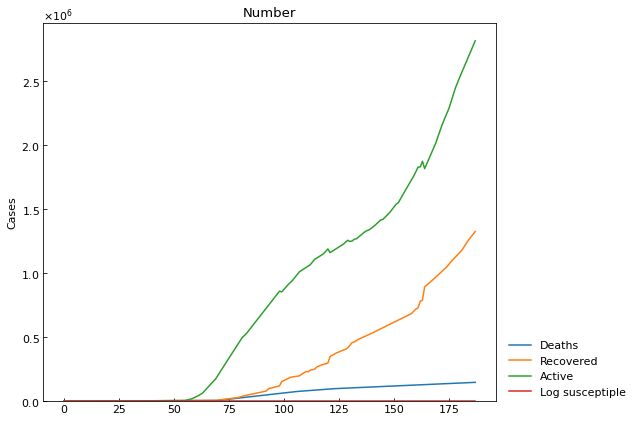

In [5]:
cvp.line_plot(df[data_cols], 'Number')

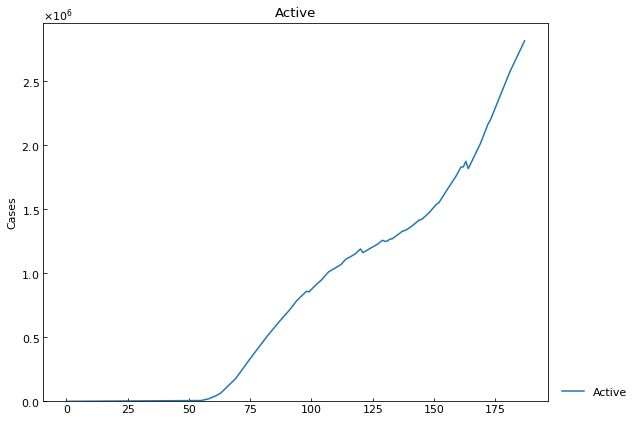

In [6]:
cvp.line_plot(df['Active'], 'Active')

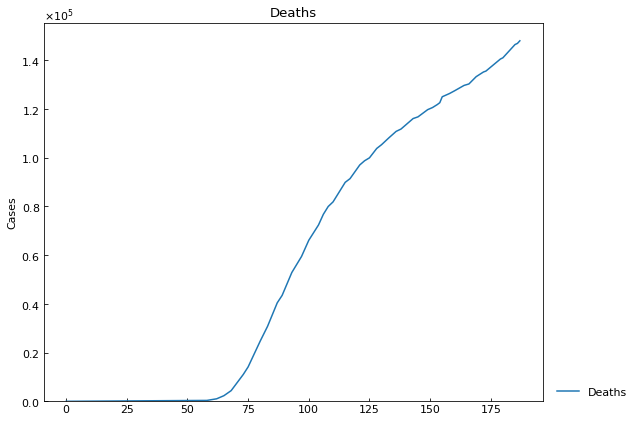

In [7]:
cvp.line_plot(df['Deaths'], 'Deaths')

In [8]:
eg_population, s0, i0, r0, d0 = df['Population'][0], df['Susceptiple'][0], df['Active'][0], df['Recovered'][0], df['Deaths'][0]

In [9]:
print(eg_population, s0, i0, r0, d0)

339573798 339573797 1 0 0


In [10]:
eg_r0, eg_kappa, eg_rho = (2.5, 0.005, 0.2)
eg_sigma = eg_rho / eg_r0 - eg_kappa
eg_initials = (0.999, 0.001, 0, 0)

In [11]:
sird_param_dict = {
    "kappa": eg_kappa, "rho": eg_rho, "sigma": eg_sigma
}
sird_simulator = cvp.ODESimulator(country="Example", province="SIR-D")
sird_simulator.add(
    model=cvp.SIRD, step_n=180, population=eg_population,
    param_dict=sird_param_dict,
    y0_dict={"Susceptible": s0, "Infected": i0, "Recovered": r0, "Fatal": d0}
)
sird_simulator.run()
sird_simulator.non_dim().tail()

<ipython-input-11-566dce8b7fdd>:10: DeprecationWarning: Please use ODESimulator.taufree(), .non_dim() or .dim(tau, start_date) directly rather than ODESimulator.run()
  sird_simulator.run()


,t,x,y,z,w
176,176,0.267352,0.206134,0.493607,0.032907
177,177,0.256697,0.200519,0.508859,0.033924
178,178,0.246754,0.194653,0.523681,0.034912
179,179,0.237481,0.188594,0.538054,0.035870
180,180,0.228836,0.182400,0.551967,0.036798


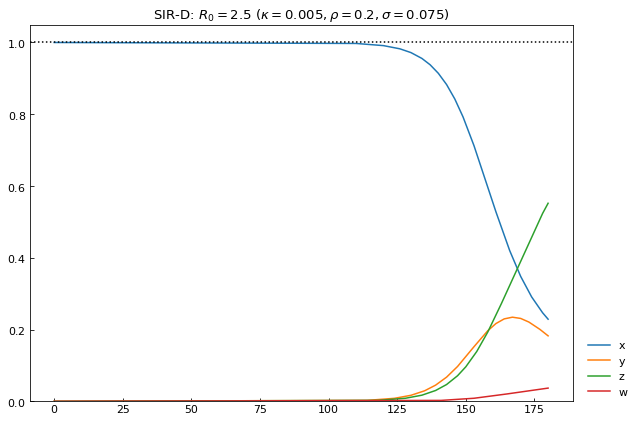

In [12]:
cvp.line_plot(
    sird_simulator.non_dim().set_index("t"),
    title=r"SIR-D: $R_0={0}\ (\kappa={1}, \rho={2}, \sigma={3})$".format(eg_r0, eg_kappa, eg_rho, eg_sigma),
    ylabel="",
    h=1
)


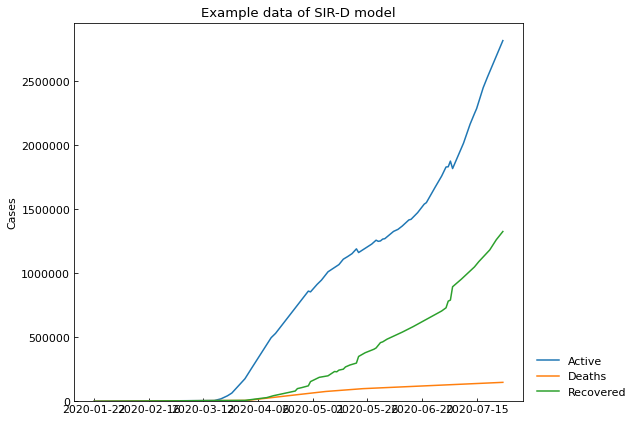

,Unnamed: 0,index,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
183,183,34394,2020-07-23,4038816,144430,1233269,2661117,68695,1114,22420,339573798,335534982,19.631237,68695
184,184,34581,2020-07-24,4112531,145560,1261624,2705347,73715,1130,28355,339573798,335461267,19.631017,73715
185,185,34768,2020-07-25,4178970,146465,1279414,2753091,66439,905,17790,339573798,335394828,19.630819,66439
186,186,34955,2020-07-26,4233923,146935,1297863,2789125,54953,470,18449,339573798,335339875,19.630655,54953
187,187,35142,2020-07-27,4290259,148011,1325804,2816444,56336,1076,27941,339573798,335283539,19.630487,56336


In [13]:
cvp.line_plot(
    df.set_index("Date")[["Active", "Deaths", "Recovered"]],
    "Example data of SIR-D model",
    h=eg_population, y_integer=True
)
df.tail()